# **Homework-4A**

Obtaining the 20newsgroups dataset either through the sklearn library or by direct download.

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20newsgroups dataset
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
              'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(categories=categories, remove=('headers', 'footers', 'quotes'))


Basic Data Exploration

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Basic data overview
print("Number of documents:", len(newsgroups.data))
print("Number of classes:", len(newsgroups.target_names))
print("Class distribution:")
for i, category in enumerate(newsgroups.target_names):
    print(f"{category}: {np.sum(newsgroups.target == i)}")



Number of documents: 11314
Number of classes: 20
Class distribution:
alt.atheism: 480
comp.graphics: 584
comp.os.ms-windows.misc: 591
comp.sys.ibm.pc.hardware: 590
comp.sys.mac.hardware: 578
comp.windows.x: 593
misc.forsale: 585
rec.autos: 594
rec.motorcycles: 598
rec.sport.baseball: 597
rec.sport.hockey: 600
sci.crypt: 595
sci.electronics: 591
sci.med: 594
sci.space: 593
soc.religion.christian: 599
talk.politics.guns: 546
talk.politics.mideast: 564
talk.politics.misc: 465
talk.religion.misc: 377


We can see that there are 11314 documents and 20 classes. We can further see the class distribution for other targets.

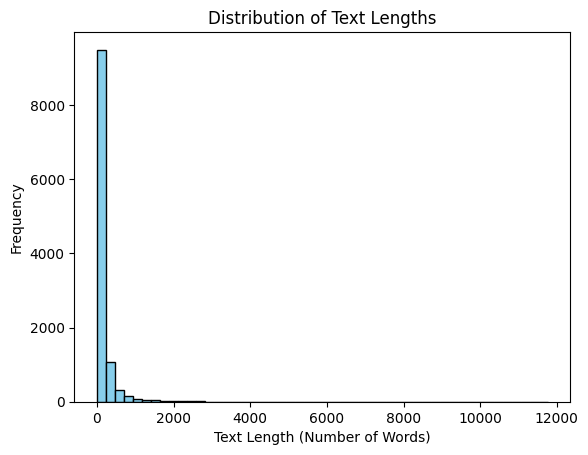

In [5]:
# Text length analysis
text_lengths = [len(doc.split()) for doc in newsgroups.data]
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()



Here we can see in this distribution that the range of text length mostly lies between 0 to 2000. There are some words with a very high frequency (i.e. above 8000) while others only have less than 1000 which is a big gap. So there are some words that are very commonly used in the newsgroups data and others are rare.
Also, the bar chart indicates that the text lengths in this corpus are skewed towards shorter documents. There are more documents with fewer words (left side of the chart) compared to longer documents (right side).

In [6]:
# Word frequency analysis (top 10 words)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
word_freq = np.array(X.sum(axis=0)).flatten()
word_indices = np.argsort(word_freq)[::-1]
feature_names = np.array(vectorizer.get_feature_names_out())
top_words = feature_names[word_indices[:10]]
print("Top 10 most common words:", top_words)

Top 10 most common words: ['ax' 'max' 'people' 'like' 'don' 'just' 'know' 'use' 'think' 'time']


This code snippet provides the top 10 most common words.
These are the words that lie in the high frequency category in tha above plot as discussed. In the newgroups, ['ax' 'max' 'people' 'like' 'don' 'just' 'know' 'use' 'think' 'time'] these are the most common words used.

Developing a reasonable text processing pipeline for transforming text into features.

In [14]:
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#load data

data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
documents = data.data  # List of text documents
targets = data.target  # List of category labels


#text cleaning

documents = [doc.lower() for doc in documents]

#punctuation removal

import string
punctuation = string.punctuation
documents = [''.join([c for c in doc if c not in punctuation]) for doc in documents]



In the text cleaning, we are converting the data to lowercase.

In [15]:
#tokenization

from nltk.tokenize import word_tokenize
tokenized_docs = [word_tokenize(doc) for doc in documents]


Here we are splitting each document into a list of words or tokens

In [16]:
#stop words removal
stop_words = stopwords.words('english')
filtered_docs = [[word for word in doc if word not in stop_words] for doc in tokenized_docs]


Here we are removing the stop words (common words like "the", "a", "an") that don't contribute much to meaning.


In [23]:
#stemming
stemmer = PorterStemmer()
stemmed_docs = [[stemmer.stem(word) for word in doc] for doc in filtered_docs]



Here we are reducing the words to their base form (e.g., "running" -> "run").

In [21]:
#vectorization
stemmed_docs = [" ".join(doc) for doc in stemmed_docs]


from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Choose optimal feature count
features = vectorizer.fit_transform(stemmed_docs)  # Can replace stemmed_docs with other processed data


Here we are converting the text data into numerical features.
TF-IDF considers both the frequency of a word within a document (term frequency) and its inverse document frequency (how rare the word is across all documents). It assigns higher weights to words that are informative for a specific document.

In [22]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
features = vectorizer.fit_transform(stemmed_docs)


BoW simply counts the occurrences of each word in a document, creating a sparse matrix. However, it doesn't account for word importance like TF-IDF.

# Observation:


**Data Cleaning**: While cleaning can improve model performance, it might remove valuable information depending on the task. We have to experiment with different options (lowercase, punctuation removal, etc.) to find the best fit.

**Stop Word Removal**: Removing common words can reduce noise but can also remove domain-specific stop words. We can consider creating custom stop word lists based on your dataset.

**Stemming/Lemmatization**: Stemming reduces words to their base form, while lemmatization aims for the "correct" root form. Stemming can sometimes create nonsensical words, so we have to evaluate the results for our specific dataset.

**Vectorization**: TF-IDF is generally a better choice than BoW as it emphasizes words that distinguish documents. The optimal feature count (number of words considered) needs to be determined through experimentation.

Additional Considerations:

N-grams: We can consider using n-grams (sequences of n consecutive words) to capture multi-word phrases potentially relevant for the classification task.
Part-of-speech (POS) tagging: Identifying the grammatical function of words (noun, verb, adjective) can provide additional features for some tasks.
By following this pipeline and adjusting parameters based on our specific dataset and task, we can effectively transform textual data from the 20 Newsgroups dataset into features suitable for machine learning models.

Here's a breakdown of two common classification models we can use with the preprocessed data from the 20 Newsgroups dataset:
Naive Bayes Classifier

In [39]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Step 1: Load and preprocess the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a classification pipeline
text_clf_nb = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),  # Naive Bayes classifier
])

# Step 4: Train the model
text_clf_nb.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_nb = text_clf_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb, target_names=newsgroups.target_names))


                          precision    recall  f1-score   support

             alt.atheism       0.86      0.12      0.21       151
           comp.graphics       0.70      0.61      0.66       202
 comp.os.ms-windows.misc       0.67      0.61      0.64       195
comp.sys.ibm.pc.hardware       0.52      0.78      0.62       183
   comp.sys.mac.hardware       0.89      0.64      0.74       205
          comp.windows.x       0.89      0.81      0.85       215
            misc.forsale       0.86      0.60      0.71       193
               rec.autos       0.85      0.73      0.79       196
         rec.motorcycles       0.51      0.74      0.61       168
      rec.sport.baseball       0.96      0.77      0.86       211
        rec.sport.hockey       0.88      0.88      0.88       198
               sci.crypt       0.63      0.83      0.71       201
         sci.electronics       0.85      0.55      0.67       202
                 sci.med       0.88      0.69      0.77       194
         

The classification report provides a detailed overview of the performance of the classifier on each class in the dataset. Here are some key insights:

1. **Precision**: This metric measures the accuracy of positive predictions. For example, in the class 'soc.religion.christian', the precision is 0.26, indicating that out of all the instances predicted as 'soc.religion.christian', only 26% were actually correct.

2. **Recall**: Recall measures the proportion of actual positives that were correctly identified by the classifier. In the class 'soc.religion.christian', the recall is 0.96, indicating that the classifier correctly identified 96% of all 'soc.religion.christian' instances.

3. **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For example, the F1-score for 'soc.religion.christian' is 0.41, indicating a reasonable balance between precision and recall.

4. **Support**: Support refers to the number of actual occurrences of each class in the dataset. It provides context for the precision, recall, and F1-score metrics.

5. **Accuracy**: The overall accuracy of the classifier is 0.66, indicating that it correctly predicted the class labels for 66% of the instances in the test set.

6. **Macro Avg and Weighted Avg**: These metrics provide the average values of precision, recall, and F1-score across all classes. The macro average gives equal weight to each class, while the weighted average takes into account class imbalance by weighting each class by its support.

Overall, the classifier performs reasonably well on some classes (e.g., 'rec.sport.baseball', 'comp.windows.x') but struggles with others (e.g., 'talk.religion.misc', 'alt.atheism').

# **LinearSVC:**

In [40]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Step 1: Load and preprocess the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups.data
y = newsgroups.target

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build a classification pipeline with LinearSVC
text_clf_svc = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC()),  # Linear Support Vector Classifier
])

# Step 4: Train the model
text_clf_svc.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred_svc = text_clf_svc.predict(X_test)
print(classification_report(y_test, y_pred_svc, target_names=newsgroups.target_names))


                          precision    recall  f1-score   support

             alt.atheism       0.64      0.64      0.64       151
           comp.graphics       0.78      0.71      0.74       202
 comp.os.ms-windows.misc       0.70      0.68      0.69       195
comp.sys.ibm.pc.hardware       0.64      0.72      0.67       183
   comp.sys.mac.hardware       0.80      0.72      0.76       205
          comp.windows.x       0.83      0.82      0.83       215
            misc.forsale       0.78      0.74      0.76       193
               rec.autos       0.52      0.79      0.63       196
         rec.motorcycles       0.79      0.76      0.78       168
      rec.sport.baseball       0.91      0.85      0.88       211
        rec.sport.hockey       0.93      0.89      0.91       198
               sci.crypt       0.88      0.79      0.83       201
         sci.electronics       0.74      0.71      0.73       202
                 sci.med       0.85      0.88      0.87       194
         

The classification report provides a detailed overview of the performance of the LinearSVC classifier on each class in the dataset:

1. **Precision**: This metric measures the accuracy of positive predictions. For example, in the class 'comp.sys.ibm.pc.hardware', the precision is 0.64, indicating that out of all the instances predicted as 'comp.sys.ibm.pc.hardware', 64% were actually correct.

2. **Recall**: Recall measures the proportion of actual positives that were correctly identified by the classifier. In the class 'talk.politics.misc', the recall is 0.65, indicating that the classifier correctly identified 65% of all 'talk.politics.misc' instances.

3. **F1-score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For example, the F1-score for 'sci.med' is 0.87, indicating a strong balance between precision and recall.

4. **Support**: Support refers to the number of actual occurrences of each class in the dataset. It provides context for the precision, recall, and F1-score metrics.

5. **Accuracy**: The overall accuracy of the classifier is 0.76, indicating that it correctly predicted the class labels for 76% of the instances in the test set.

6. **Macro Avg and Weighted Avg**: These metrics provide the average values of precision, recall, and F1-score across all classes. The macro average gives equal weight to each class, while the weighted average takes into account class imbalance by weighting each class by its support.

Overall, the classifier performs reasonably well across most classes, with F1-scores ranging from 0.48 to 0.91. However, it struggles with certain classes such as 'talk.religion.misc' and 'talk.politics.misc', where both precision and recall are relatively low.

Here's a discussion on the choice of modeling techniques for the 20 Newsgroups dataset:

**Initial Considerations:**

- **Task:** The primary goal is to classify documents into their respective newsgroup categories based on their textual content.
- **Dataset Characteristics:** The 20 Newsgroups dataset contains short text documents with a variety of vocabulary and topics.

**Model Choices:**

1. **Naive Bayes:**
    - **Advantages:**
        - Simple and efficient: Relatively easy to train and use, making it a good starting point.
        - Interpretability: Provides some understanding of which words contribute to the classification due to its probabilistic nature.
        - Handles high dimensionality: Efficiently deals with features like TF-IDF vectors that can have a large number of dimensions.
    - **Disadvantages:**
        - Assumption of independence: Naive Bayes assumes independence between features, which might not be entirely true for text data where words can be related.
        - Potential for overfitting:  May be susceptible to overfitting on small datasets without proper regularization.

2. **Support Vector Machine (SVM) with Linear Kernel:**
    - **Advantages:**
        - High accuracy: SVMs can achieve excellent classification performance on various text classification tasks.
        - Robust to irrelevant features: Less sensitive to features that don't contribute much to classification.
    - **Disadvantages:**
        - Hyperparameter tuning: Requires careful selection of hyperparameters (e.g., regularization) for optimal performance.
        - Interpretability: Can be challenging to understand the specific reasons behind predictions.
        - Computational cost: Training SVMs can be computationally expensive, especially for large datasets.

**Why These Models?**

- Both Naive Bayes and SVM with a linear kernel are well-suited for text classification problems with large numbers of features (like those generated from TF-IDF).
- Naive Bayes offers a balance of simplicity, efficiency, and interpretability, making it a good initial choice to establish a baseline performance.
- SVM, particularly with a linear kernel, can potentially achieve higher accuracy but requires more effort in hyperparameter tuning and might be less interpretable.

**Additional Considerations:**

- **Ensemble Methods:** Consider exploring ensemble models like Random Forest or Gradient Boosting that combine multiple models (e.g., decision trees) for potentially better classification accuracy.
- **Neural Networks:** Deep learning approaches like Long Short-Term Memory (LSTM) networks can be powerful for capturing long-range dependencies in text data, but they typically require larger datasets and significant computational resources for training.

**Conclusion:**

The choice between Naive Bayes and SVM depends on your specific priorities. If interpretability and ease of use are crucial, Naive Bayes is a good starting point. If you prioritize achieving the highest possible accuracy and have the resources for hyperparameter tuning, explore SVM.  Ultimately, it's important to evaluate both models using metrics like accuracy, precision, recall, and F1-score on a held-out test set to determine which one performs better on your specific data.



# **Homework-4B**

3 techniques to evaluate the model:
Confusion Matrix: This technique provides a tabular representation of the performance of a classification model. It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) predicted by the model.

Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC): The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1-specificity) for different threshold values. The AUC measures the entire two-dimensional area underneath the ROC curve, providing an aggregate measure of model performance across all possible thresholds.

Accuracy Score: Accuracy is a straightforward metric that measures the proportion of correctly classified instances out of all instances. While it provides a general measure of overall model performance, it may not capture class imbalances or specific performance characteristics as effectively as other metrics. However, when used in conjunction with other evaluation techniques like the confusion matrix and ROC curve, accuracy can complement the insights gained from these more detailed analyses.

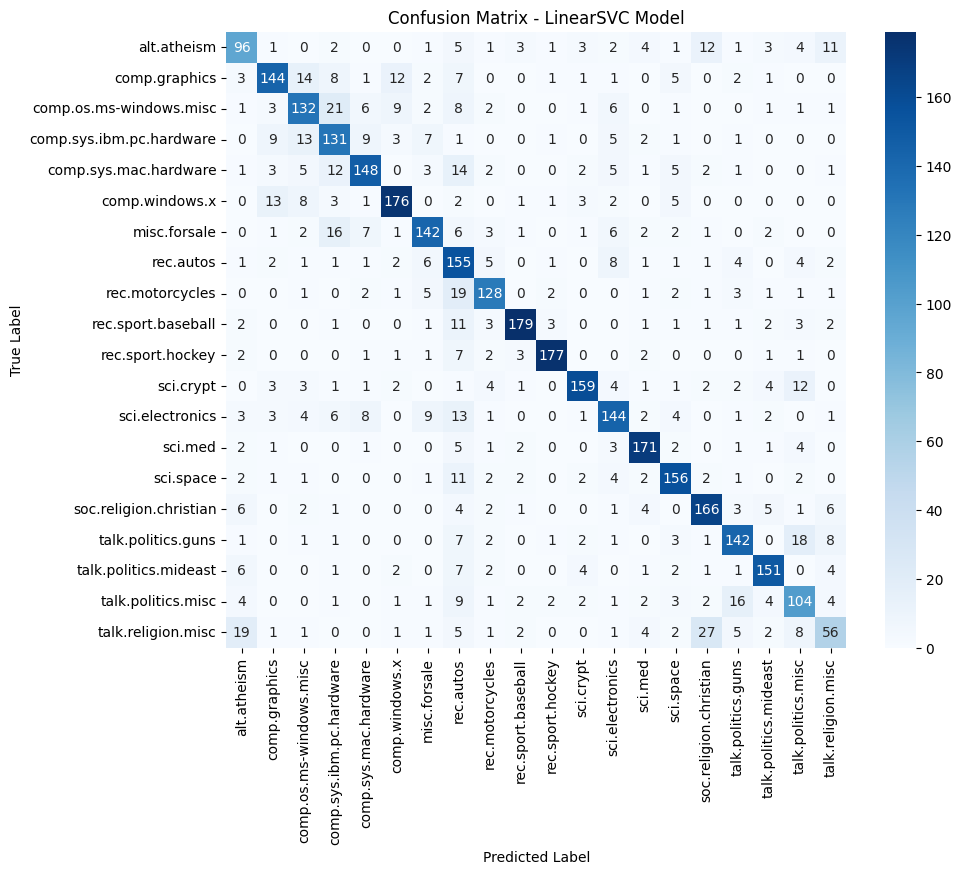

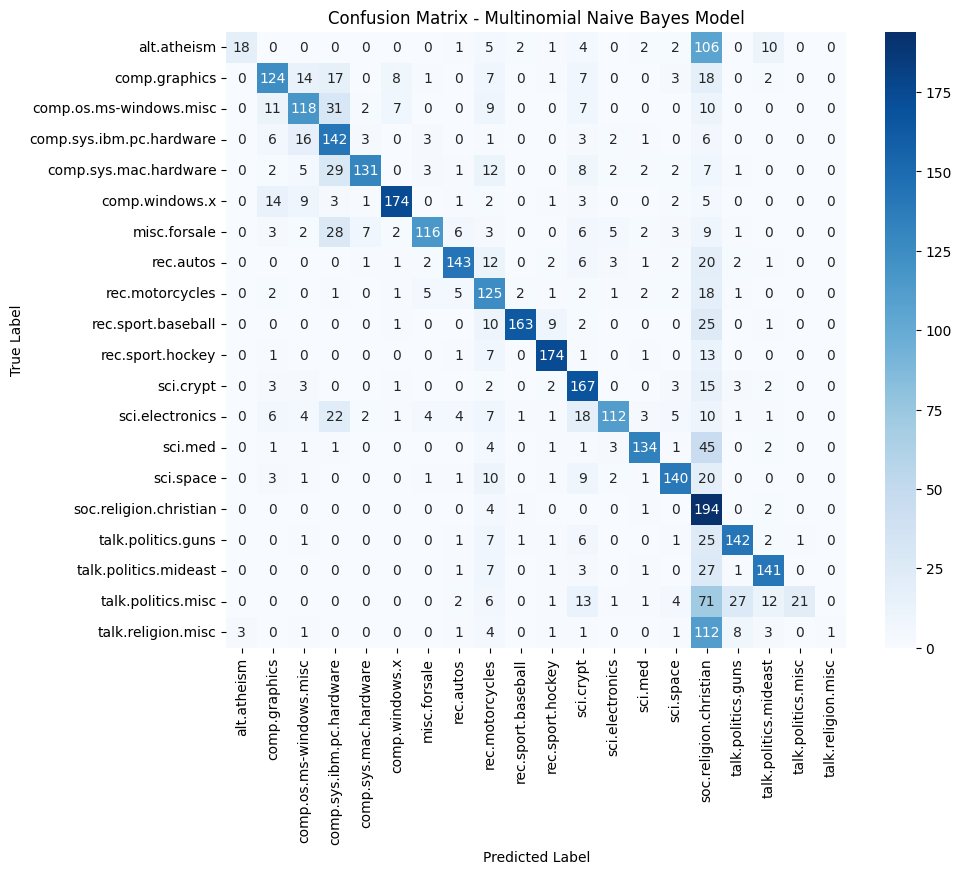

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# LinearSVC model
confusion_svc = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_svc, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title("Confusion Matrix - LinearSVC Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Multinomial Naive Bayes model
confusion_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_nb, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.title("Confusion Matrix - Multinomial Naive Bayes Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**LinearSVC:**

The confusion matrix suggests the SVM model achieves moderate performance on this text classification task. While some categories like "rec.sport.hockey" and "rec.sport.baseball" have a good number of correctly classified documents (high diagonal values), others like "soc.religion.christian" show more frequent misclassifications (higher off-diagonal values).

**Multinomial Naive Bayes Model**:

The confusion matrix suggests the Multinomial Naive Bayes model achieves an okay performance on this text classification task. Some categories like "comp.windows.x", "soc.religion.christian", "rec.sport.hockey" have a good number of correctly classified documents (high diagonal values). Even though "soc.religion.christian" has the highest diagonal value, it also shows more frequent misclassifications (higher off-diagonal values).

So, according to this evaluation, LinearSVC turns out to be better in performance as it has lesser off-diagonal values.

Since AUC-ROC curve is typically used for binary classification problems, we can't directly compute it for multiclass classification. However, we can still compute the ROC curve and AUC score for each class separately using a one-vs-rest strategy.

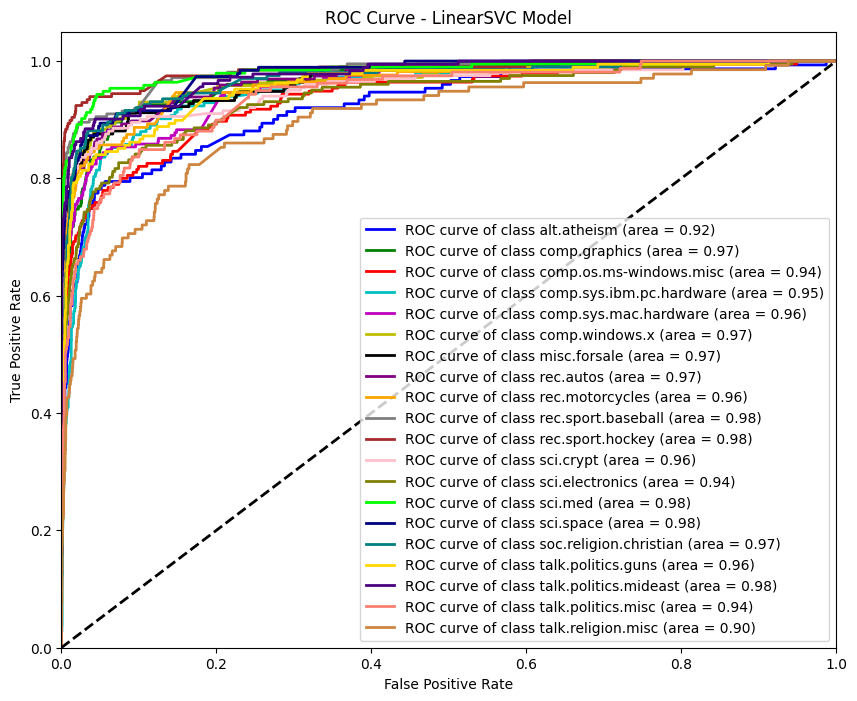

In [45]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# LinearSVC model
y_score_svc = text_clf_svc.decision_function(X_test)
for i in range(len(newsgroups.target_names)):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score_svc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'lime', 'navy', 'teal', 'gold', 'indigo', 'salmon', 'peru']
for i, color in zip(range(len(newsgroups.target_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(newsgroups.target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LinearSVC Model')
plt.legend(loc="lower right")
plt.show()



This ROC curve suggests that the Multinomial Naive Bayes model has moderate performance for classifying newsgroups documents. While the curve approaches the top-left corner (indicating perfect classification), it's not very close. This means the model can distinguish between some classes better than others. The area under the curve (AUC) would provide a more quantitative measure of the model's performance. A higher AUC closer to 1 signifies better overall classification ability.

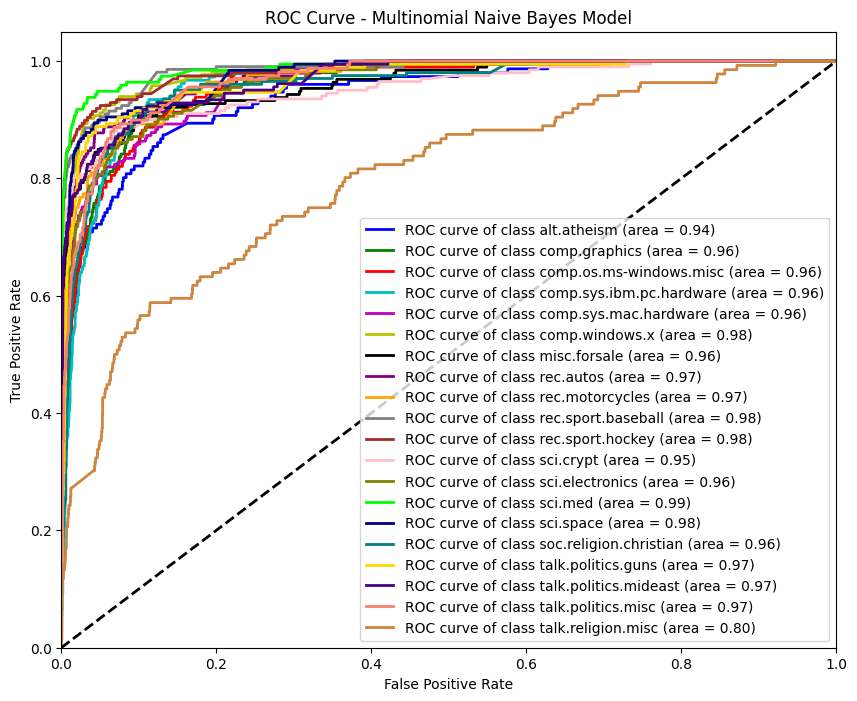

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()

# Multinomial Naive Bayes model
y_score_nb = text_clf_nb.predict_proba(X_test)
for i in range(len(newsgroups.target_names)):
    fpr_nb[i], tpr_nb[i], _ = roc_curve((y_test == i).astype(int), y_score_nb[:, i])
    roc_auc_nb[i] = auc(fpr_nb[i], tpr_nb[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'lime', 'navy', 'teal', 'gold', 'indigo', 'salmon', 'peru']
for i, color in zip(range(len(newsgroups.target_names)), colors):
    plt.plot(fpr_nb[i], tpr_nb[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(newsgroups.target_names[i], roc_auc_nb[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()


This curve bows toward the top-left corner suggests good classification performance. The closer the curve is to the top-left corner, the better the model can distinguish between positive and negative classes.
Area Under the Curve (AUC): The AUC is closer to 1 which indicates better classification ability.

ROC curve for class talk.religion.misc is showing 0.80 which is not very close to 1 while for the above model it is 0.90. Looking at the AUC for both the models, you can't actually identify which one is better. Both have almost the same performance. I feel it is not a very good identifier of a better model.

In [43]:
from sklearn.metrics import accuracy_score

# LinearSVC model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy of LinearSVC model:", accuracy_svc)

# Multinomial Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Multinomial Naive Bayes model:", accuracy_nb)


Accuracy of LinearSVC model: 0.7578249336870027
Accuracy of Multinomial Naive Bayes model: 0.6578249336870027


The LinearSVC model achieved a higher accuracy (75.78%) compared to the Multinomial Naive Bayes model (65.78%). This indicates that the LinearSVC model performed better overall in classifying the documents into their respective categories. However, it's essential to consider other evaluation metrics and potential biases in the dataset to make a comprehensive assessment of model performance.

Choosing the confusion matrix, ROC curve, and accuracy score as evaluation techniques provides a well-rounded assessment of the models' performance.

1. **Confusion Matrix**: It allows for a detailed examination of the model's predictions by showing the true positive, false positive, true negative, and false negative rates for each class. This information is valuable for understanding where the model excels and where it struggles in classification.

2. **ROC Curve and AUC Score**: The ROC curve provides insights into the trade-off between true positive rate and false positive rate across different thresholds. The AUC score summarizes the ROC curve into a single metric, providing an aggregate measure of the model's ability to discriminate between classes. This evaluation technique is particularly useful for understanding the model's performance across various classification thresholds and its overall discriminatory power.

3. **Accuracy Score**: Accuracy is a straightforward metric that measures the proportion of correctly classified instances out of all instances. While it provides a general measure of overall model performance, it may not capture class imbalances or specific performance characteristics as effectively as other metrics. However, when used in conjunction with other evaluation techniques like the confusion matrix and ROC curve, accuracy can complement the insights gained from these more detailed analyses.



At last, we can see that from all the three evaluation techniques, from two of them we can identify that LinearSVC is a better model. It had lesser off diagonal values and a better accuracy. So, we can use it for a better prediction.